In [21]:
# Import necessary libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import gradio as gr


In [22]:
# Load the csv file and get an overview of the dataframe
baggage = pd.read_csv('C:/Users/abhij/Downloads/Commercial_Aviation_-_Mishandled_Baggage_and_Mishandled_Wheelchairs_and_Scooter.csv')
print(baggage.head(10))

   YEAR  MONTH  QUARTER  AIRLINE_ID CARRIER              CARRIER_NAME  \
0  2016      4        2       20416      NK          Spirit Air Lines   
1  2016     10        4       19805      AA    American Airlines Inc.   
2  2016     10        4       19930      AS      Alaska Airlines Inc.   
3  2016     10        4       20409      B6           JetBlue Airways   
4  2016     10        4       19790      DL      Delta Air Lines Inc.   
5  2016     10        4       20366      EV  ExpressJet Airlines Inc.   
6  2016     10        4       20436      F9    Frontier Airlines Inc.   
7  2016     10        4       19690      HA    Hawaiian Airlines Inc.   
8  2016     10        4       20416      NK          Spirit Air Lines   
9  2016     10        4       20304      OO     SkyWest Airlines Inc.   

  UNIQUE_CARRIER       UNIQUE_CARRIER_NAME  PASSENGERS  MISHANDLED_BAGGAGE  \
0             NK          Spirit Air Lines   1585779.0                3644   
1             AA    American Airlines In

In [23]:
# Filter the dataframe to only include data from year 2019 - 2021
baggage = baggage[baggage['YEAR'].isin([2019, 2020, 2021])]
print(baggage.head())

     YEAR  MONTH  QUARTER  AIRLINE_ID CARRIER            CARRIER_NAME  \
326  2019      1        1       19790      DL    Delta Air Lines Inc.   
327  2019      1        1       19790      DL    Delta Air Lines Inc.   
328  2019      1        1       20398      MQ               Envoy Air   
329  2019      1        1       19393      WN  Southwest Airlines Co.   
330  2019      1        1       20363      9E       Endeavor Air Inc.   

    UNIQUE_CARRIER     UNIQUE_CARRIER_NAME  PASSENGERS  MISHANDLED_BAGGAGE  \
326             DL    Delta Air Lines Inc.         NaN               26795   
327             DL    Delta Air Lines Inc.         NaN                8856   
328             MQ               Envoy Air         NaN                7121   
329             WN  Southwest Airlines Co.         NaN               46170   
330             9E       Endeavor Air Inc.         NaN                3505   

     ENPLANED_BAGGAGE  MISHANDLED_WCHR_SCTR  ENPLANED_WCHR_SCTR FORM_TYPE  \
326         564

In [24]:
# Check for null values in the dataframe
print(baggage.isnull())
print(baggage.isnull().sum())

       YEAR  MONTH  QUARTER  AIRLINE_ID  CARRIER  CARRIER_NAME  \
326   False  False    False       False    False         False   
327   False  False    False       False    False         False   
328   False  False    False       False    False         False   
329   False  False    False       False    False         False   
330   False  False    False       False    False         False   
...     ...    ...      ...         ...      ...           ...   
1078  False  False    False       False    False         False   
1079  False  False    False       False    False         False   
1080  False  False    False       False    False         False   
1081  False  False    False       False    False         False   
1082  False  False    False       False    False         False   

      UNIQUE_CARRIER  UNIQUE_CARRIER_NAME  PASSENGERS  MISHANDLED_BAGGAGE  \
326            False                False        True               False   
327            False                False        True

In [25]:
# Remove the column 'PASSENGERS' from the datafram because all its entries are null
baggage = baggage.drop(columns = ['PASSENGERS'])
print(baggage.head())

     YEAR  MONTH  QUARTER  AIRLINE_ID CARRIER            CARRIER_NAME  \
326  2019      1        1       19790      DL    Delta Air Lines Inc.   
327  2019      1        1       19790      DL    Delta Air Lines Inc.   
328  2019      1        1       20398      MQ               Envoy Air   
329  2019      1        1       19393      WN  Southwest Airlines Co.   
330  2019      1        1       20363      9E       Endeavor Air Inc.   

    UNIQUE_CARRIER     UNIQUE_CARRIER_NAME  MISHANDLED_BAGGAGE  \
326             DL    Delta Air Lines Inc.               26795   
327             DL    Delta Air Lines Inc.                8856   
328             MQ               Envoy Air                7121   
329             WN  Southwest Airlines Co.               46170   
330             9E       Endeavor Air Inc.                3505   

     ENPLANED_BAGGAGE  MISHANDLED_WCHR_SCTR  ENPLANED_WCHR_SCTR FORM_TYPE  \
326         5649923.0                  91.0             10239.0    FORM-1   
327       

In [26]:
# Check the dataframe for duplicates
duplicates = baggage.duplicated()
num_duplicates = duplicates.sum()
duplicates
num_duplicates

0

In [27]:
# Check the datatypes of each column in the dataframe
baggage.dtypes

YEAR                      int64
MONTH                     int64
QUARTER                   int64
AIRLINE_ID                int64
CARRIER                  object
CARRIER_NAME             object
UNIQUE_CARRIER           object
UNIQUE_CARRIER_NAME      object
MISHANDLED_BAGGAGE        int64
ENPLANED_BAGGAGE        float64
MISHANDLED_WCHR_SCTR    float64
ENPLANED_WCHR_SCTR      float64
FORM_TYPE                object
MKT_CARRIER_FLAG         object
dtype: object

In [28]:
# Get the summary statitics of the dataframe
baggage.describe()

,YEAR,MONTH,QUARTER,AIRLINE_ID,MISHANDLED_BAGGAGE,ENPLANED_BAGGAGE,MISHANDLED_WCHR_SCTR,ENPLANED_WCHR_SCTR
count,757.000000,757.000000,757.000000,757.000000,757.000000,7.570000e+02,757.000000,757.000000
mean,2019.957728,6.322325,2.450462,20088.207398,8976.406869,1.694966e+06,30.628798,2221.272127
std,0.808885,3.373440,1.103980,319.463138,12236.671848,2.072427e+06,44.145723,2915.315528
min,2019.000000,1.000000,1.000000,19393.000000,0.000000,5.630000e+02,0.000000,0.000000
25%,2019.000000,3.000000,1.000000,19805.000000,1628.000000,4.856400e+05,5.000000,442.000000
50%,2020.000000,6.000000,2.000000,19977.000000,4473.000000,8.949110e+05,14.000000,1132.000000
75%,2021.000000,9.000000,3.000000,20397.000000,9701.000000,2.107244e+06,35.000000,2721.000000
max,2021.000000,12.000000,4.000000,20452.000000,72725.000000,1.166432e+07,263.000000,15570.000000


In [29]:
# Calculate average number of mishandled baggage cases per year
average_baggage = baggage.groupby('YEAR')['MISHANDLED_BAGGAGE'].mean().reset_index()
print(average_baggage)

   YEAR  MISHANDLED_BAGGAGE
0  2019        13594.867424
1  2020         4230.375479
2  2021         9060.202586


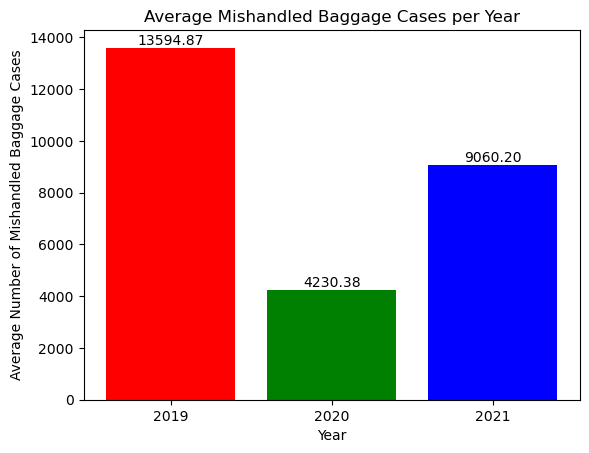

In [30]:
# Display the average number of mishandled baggage cases per year
colors = ['red', 'green', 'blue']
# Plot the average number of mishandled baggage cases per year
fig, ax = plt.subplots()
bars = ax.bar(average_baggage['YEAR'], average_baggage['MISHANDLED_BAGGAGE'], color=['red', 'green', 'blue'])

# Add title and labels
ax.set_title('Average Mishandled Baggage Cases per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Number of Mishandled Baggage Cases')
ax.set_xticks([2019, 2020, 2021])  # Ensure only the three specified years are included on the x-axis

# Label each bar with its value
ax.bar_label(bars, fmt='%.2f')
plt.show()

In [31]:
# Display the average mishandled baggage cases per month
# Group the data to calculate mishandled cases per month
baggage_monthly = baggage.groupby('MONTH')['MISHANDLED_BAGGAGE'].mean().reset_index()

# Map numerical month to month names
baggage_monthly['MONTH'] = baggage_monthly['MONTH'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))

# Sort by month
baggage_monthly = baggage_monthly.sort_values(by='MONTH', key=lambda x: pd.to_datetime(x, format='%b'))

print(baggage_monthly)





   MONTH  MISHANDLED_BAGGAGE
0    Jan         9610.636364
1    Feb         9217.676923
2    Mar         8121.000000
3    Apr         6138.169231
4    May         7988.553846
5    Jun        11198.753846
6    Jul        11330.815385
7    Aug        10577.661538
8    Sep         6885.446154
9    Oct         8623.000000
10   Nov         7570.296875
11   Dec        11155.627907


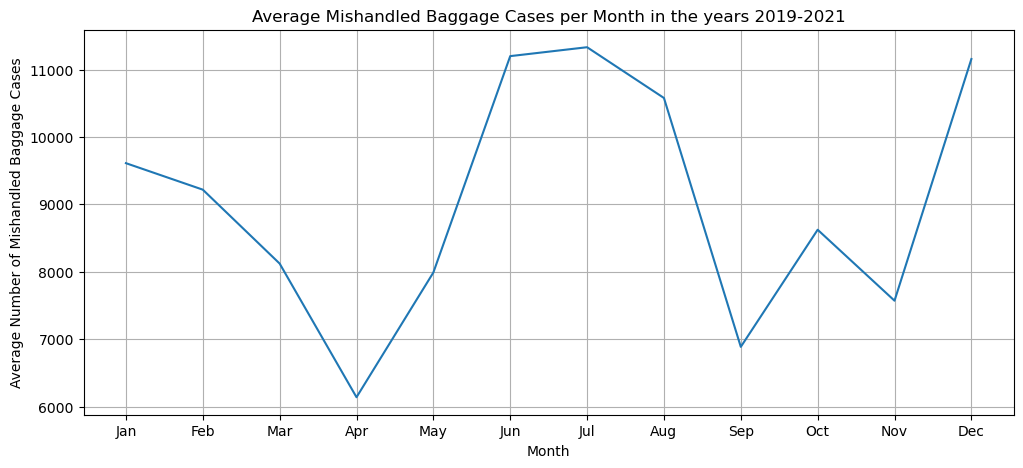

In [32]:


# Plot the average mishandled baggage cases per month
plt.figure(figsize=(12,5))
plt.plot(baggage_monthly['MONTH'], baggage_monthly['MISHANDLED_BAGGAGE'])
plt.title('Average Mishandled Baggage Cases per Month in the years 2019-2021')
plt.xlabel('Month')
plt.ylabel('Average Number of Mishandled Baggage Cases')
plt.grid(True)


plt.show()

CARRIER_NAME
American Airlines Inc.      2009631
Southwest Airlines Co.      1007794
Delta Air Lines Inc.         928801
United Air Lines Inc.        899895
SkyWest Airlines Inc.        352811
Alaska Airlines Inc.         314604
Envoy Air                    220424
PSA Airlines Inc.            181718
Republic Airline             148800
JetBlue Airways              147873
Mesa Airlines Inc.           146952
Spirit Air Lines             126870
Endeavor Air Inc.            103136
Frontier Airlines Inc.        84386
Hawaiian Airlines Inc.        45114
Allegiant Air                 25199
ExpressJet Airlines LLC       23134
Horizon Air                   20992
ExpressJet Airlines Inc.       7006
Name: MISHANDLED_BAGGAGE, dtype: int64


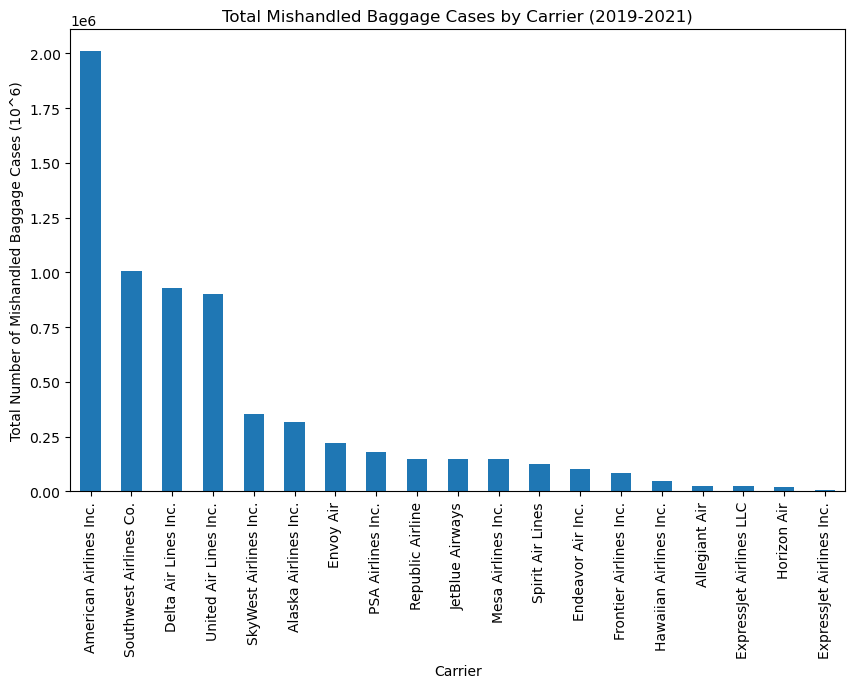

In [33]:
# Calculate the total number of mishandled baggages by carrier in US in years 2019-2021
baggage_carrier = baggage.groupby('CARRIER_NAME')['MISHANDLED_BAGGAGE'].sum().sort_values(ascending=False)

# Display the total mishandled baggage by carrier
print(baggage_carrier)


# Plot the total mishandled baggage by carrier
baggage_carrier.plot(kind='bar', figsize=(10, 6))
plt.title('Total Mishandled Baggage Cases by Carrier (2019-2021)')
plt.xlabel('Carrier')
plt.ylabel('Total Number of Mishandled Baggage Cases (10^6)')
plt.show()

CARRIER_NAME
Envoy Air                   0.808315
American Airlines Inc.      0.702232
Mesa Airlines Inc.          0.632278
Republic Airline            0.609251
ExpressJet Airlines Inc.    0.569965
PSA Airlines Inc.           0.533406
United Air Lines Inc.       0.495952
SkyWest Airlines Inc.       0.482911
Alaska Airlines Inc.        0.467374
JetBlue Airways             0.465989
ExpressJet Airlines LLC     0.450165
Horizon Air                 0.447453
Hawaiian Airlines Inc.      0.433929
Spirit Air Lines            0.418511
Delta Air Lines Inc.        0.380080
Endeavor Air Inc.           0.370440
Frontier Airlines Inc.      0.354670
Southwest Airlines Co.      0.343706
Allegiant Air               0.160285
Name: RATE_MISHANDLED, dtype: float64


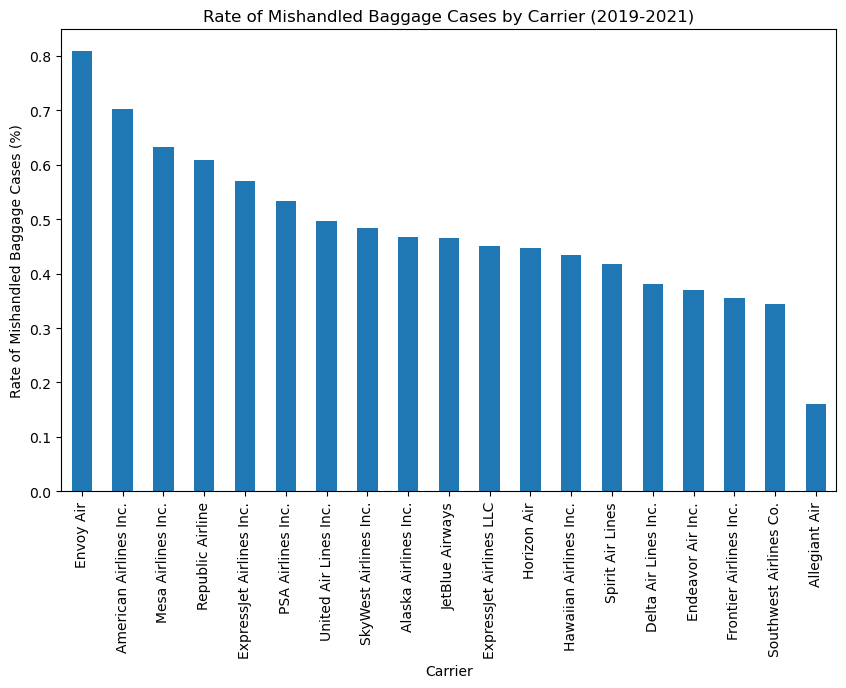

In [34]:
# Create a column showcasing the rate of percentage of misplaced baggage for each carrier
baggage['RATE_MISHANDLED'] = baggage['MISHANDLED_BAGGAGE']/baggage['ENPLANED_BAGGAGE'] * 100


# Calculate the rate of mishandled baggages by carrier in US in years 2019-2021
rate_carrier = baggage.groupby('CARRIER_NAME')['RATE_MISHANDLED'].mean().sort_values(ascending=False)

# Display the total mishandled baggage by carrier
print(rate_carrier)


# Plot the total mishandled baggage by carrier
rate_carrier.plot(kind='bar', figsize=(10, 6))
plt.title('Rate of Mishandled Baggage Cases by Carrier (2019-2021)')
plt.xlabel('Carrier')
plt.ylabel('Rate of Mishandled Baggage Cases (%)')
plt.show()

   YEAR  MISHANDLED_WCHR_SCTR
0  2019             45.037879
1  2020             15.333333
2  2021             31.439655


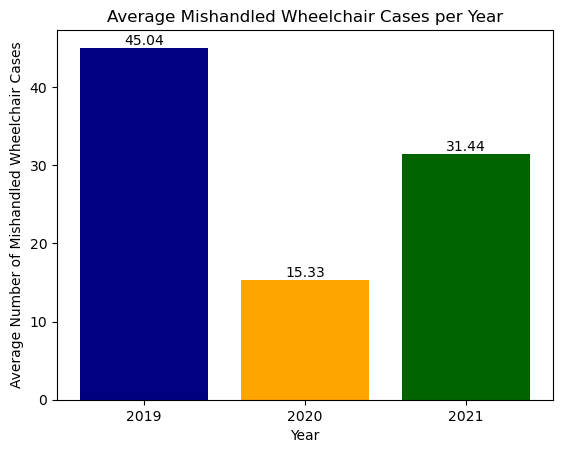

In [35]:
# Calculate average number of mishandled wheelchair cases per year
average_wheelchair = baggage.groupby('YEAR')['MISHANDLED_WCHR_SCTR'].mean().reset_index()
print(average_wheelchair)

# Display the average number of mishandled wheelchair cases per year
colors_wheelchair = ['navy', 'orange', 'darkgreen']
# Plot the average number of mishandled baggage cases per year
fig, ax = plt.subplots()
bars_wheelchair = ax.bar(average_wheelchair['YEAR'], average_wheelchair['MISHANDLED_WCHR_SCTR'], color=colors_wheelchair)

# Add title and labels
ax.set_title('Average Mishandled Wheelchair Cases per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Average Number of Mishandled Wheelchair Cases')
ax.set_xticks([2019, 2020, 2021])  # Ensure only the three specified years are included on the x-axis

# Label each bar with its value
ax.bar_label(bars_wheelchair, fmt='%.2f')
plt.show()

   MONTH  MISHANDLED_WCHR_SCTR
0    Jan             28.075758
1    Feb             26.123077
2    Mar             26.492308
3    Apr             20.907692
4    May             27.923077
5    Jun             33.523077
6    Jul             37.600000
7    Aug             35.384615
8    Sep             30.369231
9    Oct             35.000000
10   Nov             34.796875
11   Dec             31.976744


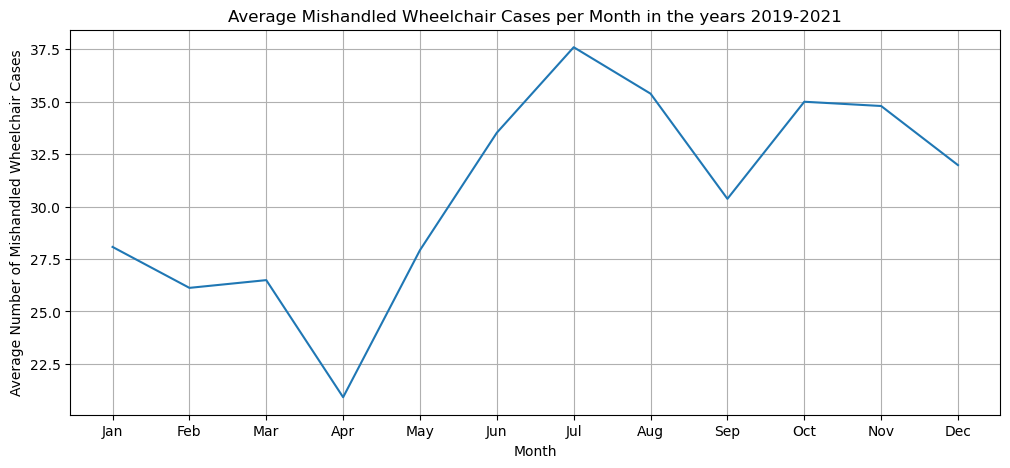

In [36]:
# Display the average mishandled wheelchair cases per month
# Group the data to calculate mishandled cases per month
wheelchair_monthly = baggage.groupby('MONTH')['MISHANDLED_WCHR_SCTR'].mean().reset_index()

# Map numerical month to month names
wheelchair_monthly['MONTH'] = wheelchair_monthly['MONTH'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))

# Sort by month
wheelchair_monthly = wheelchair_monthly.sort_values(by='MONTH', key=lambda x: pd.to_datetime(x, format='%b'))

print(wheelchair_monthly)

# Plot the average mishandled baggage cases per month
plt.figure(figsize=(12,5))
plt.plot(wheelchair_monthly['MONTH'], wheelchair_monthly['MISHANDLED_WCHR_SCTR'])
plt.title('Average Mishandled Wheelchair Cases per Month in the years 2019-2021')
plt.xlabel('Month')
plt.ylabel('Average Number of Mishandled Wheelchair Cases')
plt.grid(True)


plt.show()

CARRIER_NAME
American Airlines Inc.      5434.0
Southwest Airlines Co.      4740.0
United Air Lines Inc.       3157.0
Delta Air Lines Inc.        2946.0
JetBlue Airways             1224.0
Spirit Air Lines            1035.0
SkyWest Airlines Inc.        911.0
Frontier Airlines Inc.       862.0
Alaska Airlines Inc.         665.0
Republic Airline             421.0
Envoy Air                    418.0
PSA Airlines Inc.            392.0
Mesa Airlines Inc.           315.0
Endeavor Air Inc.            212.0
Hawaiian Airlines Inc.       208.0
Allegiant Air                146.0
ExpressJet Airlines LLC       47.0
Horizon Air                   32.0
ExpressJet Airlines Inc.      21.0
Name: MISHANDLED_WCHR_SCTR, dtype: float64


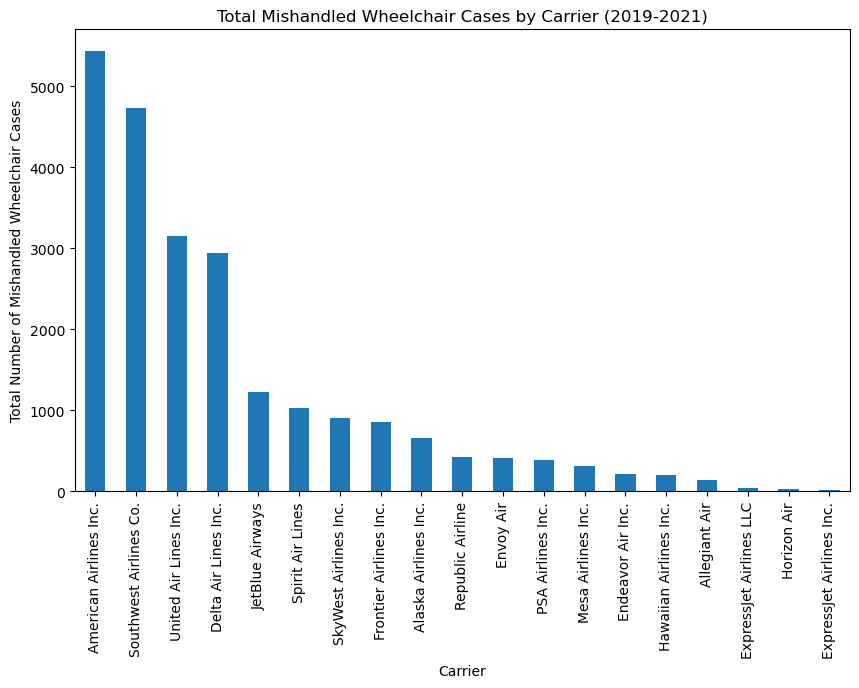

In [37]:
# Calculate total number of mishandled wheelchair by the carrier in US (2019-2021)
wheelchair_carrier = baggage.groupby('CARRIER_NAME')['MISHANDLED_WCHR_SCTR'].sum().sort_values(ascending=False)
print(wheelchair_carrier)

# Plot the total mishandled wheelchair by carrier
wheelchair_carrier.plot(kind='bar', figsize=(10, 6))
plt.title('Total Mishandled Wheelchair Cases by Carrier (2019-2021)')
plt.xlabel('Carrier')
plt.ylabel('Total Number of Mishandled Wheelchair Cases')
plt.show()

CARRIER_NAME
ExpressJet Airlines Inc.    4.266135
Spirit Air Lines            3.214227
PSA Airlines Inc.           2.917069
Envoy Air                   2.784535
American Airlines Inc.      2.470176
JetBlue Airways             2.074815
Southwest Airlines Co.      1.746220
Mesa Airlines Inc.          1.578131
Frontier Airlines Inc.      1.571175
Republic Airline            1.382957
Alaska Airlines Inc.        1.259784
United Air Lines Inc.       1.207997
ExpressJet Airlines LLC     1.138442
SkyWest Airlines Inc.       0.990322
Hawaiian Airlines Inc.      0.934815
Horizon Air                 0.679856
Allegiant Air               0.608268
Delta Air Lines Inc.        0.606336
Endeavor Air Inc.           0.456230
Name: RATE_WHEELCHAIR, dtype: float64


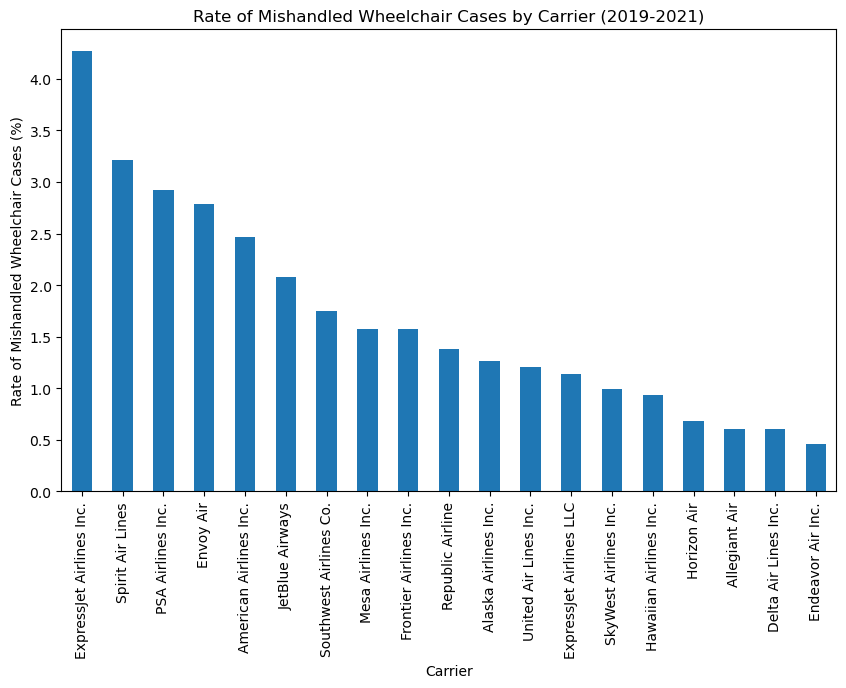

In [38]:
# Create a column showcasing the rate of percentage of misplaced wheelchair for each carrier
baggage['RATE_WHEELCHAIR'] = baggage['MISHANDLED_WCHR_SCTR']/baggage['ENPLANED_WCHR_SCTR'] * 100


# Calculate the rate of mishandled baggages by carrier in US in years 2019-2021
rate_carrier_wheelchair = baggage.groupby('CARRIER_NAME')['RATE_WHEELCHAIR'].mean().sort_values(ascending=False)

# Display the total mishandled baggage by carrier
print(rate_carrier_wheelchair)


# Plot the total mishandled baggage by carrier
rate_carrier_wheelchair.plot(kind='bar', figsize=(10, 6))
plt.title('Rate of Mishandled Wheelchair Cases by Carrier (2019-2021)')
plt.xlabel('Carrier')
plt.ylabel('Rate of Mishandled Wheelchair Cases (%)')
plt.show()

                      MISHANDLED_BAGGAGE  MISHANDLED_WCHR_SCTR
MISHANDLED_BAGGAGE              1.000000              0.895928
MISHANDLED_WCHR_SCTR            0.895928              1.000000


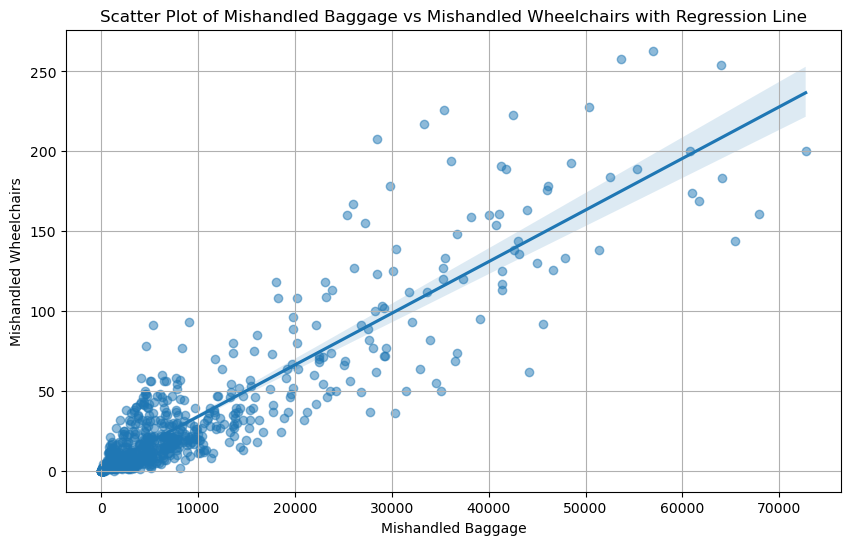

In [39]:
# Calculate the correlation between mispaced baggage and misplaced wheelchair
correlation = baggage[['MISHANDLED_BAGGAGE', 'MISHANDLED_WCHR_SCTR']].corr()
print(correlation)

# Plot a scatterplot to showcase the correlatiob between misplaced baggage and mispaced wheelchair
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='MISHANDLED_BAGGAGE', y='MISHANDLED_WCHR_SCTR', data=baggage, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Mishandled Baggage vs Mishandled Wheelchairs with Regression Line')
plt.xlabel('Mishandled Baggage')
plt.ylabel('Mishandled Wheelchairs')
plt.grid(True)
plt.show()

In [40]:
# Calculate mishandling rates for each carrier
carrier_stats = baggage.groupby('CARRIER_NAME').agg({
    'MISHANDLED_BAGGAGE': 'sum',
    'ENPLANED_BAGGAGE': 'sum',
    'MISHANDLED_WCHR_SCTR': 'sum',
    'ENPLANED_WCHR_SCTR': 'sum'
}).reset_index()

carrier_stats['BAGGAGE_MISHANDLED_RATE'] = carrier_stats['MISHANDLED_BAGGAGE'] / carrier_stats['ENPLANED_BAGGAGE']
carrier_stats['WCHR_SCTR_MISHANDLED_RATE'] = carrier_stats['MISHANDLED_WCHR_SCTR'] / carrier_stats['ENPLANED_WCHR_SCTR']

def get_mishandling_rates(carrier):
    selected_stats = carrier_stats[carrier_stats['CARRIER_NAME'] == carrier]
    if not selected_stats.empty:
        baggage_rate = selected_stats['BAGGAGE_MISHANDLED_RATE'].values[0]
        wheelchair_rate = selected_stats['WCHR_SCTR_MISHANDLED_RATE'].values[0]
        return f'Probability of baggage being mishandled: {baggage_rate * 100:.2f}%', f'Probability of wheelchair or scooter being mishandled: {wheelchair_rate * 100:.2f}%'
    else:
        return 'No data available for the selected carrier.', ''

carrier_list = carrier_stats['CARRIER_NAME'].tolist()
interface = gr.Interface(
    fn=get_mishandling_rates,
    inputs=gr.Dropdown(choices=carrier_list, label="Select a carrier"),
    outputs=[gr.Textbox(label="Baggage Mishandling Rate"), gr.Textbox(label="Wheelchair Mishandling Rate")],
    title="Carrier Mishandling Rates"
)

if __name__ == "__main__":
    interface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
